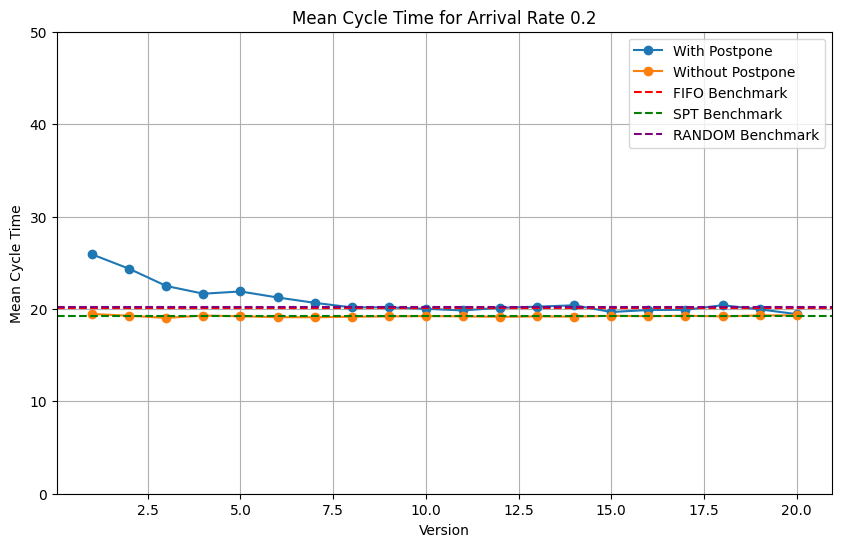

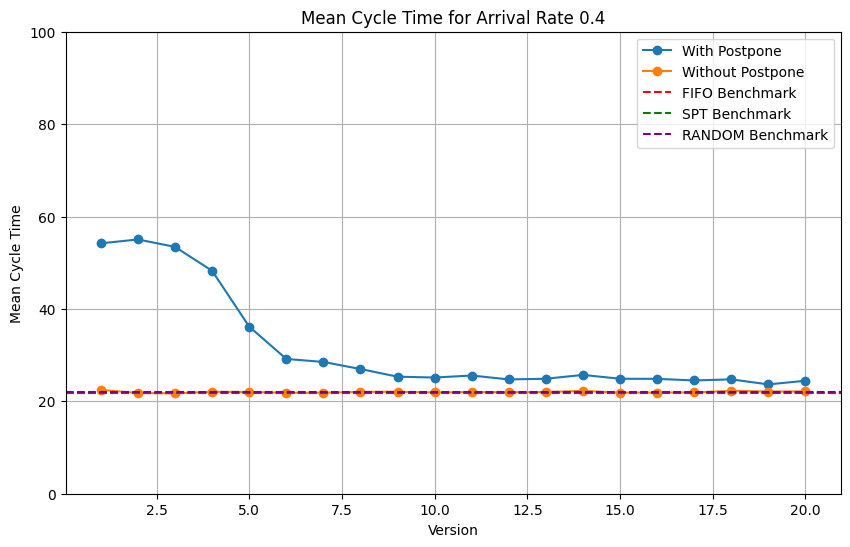

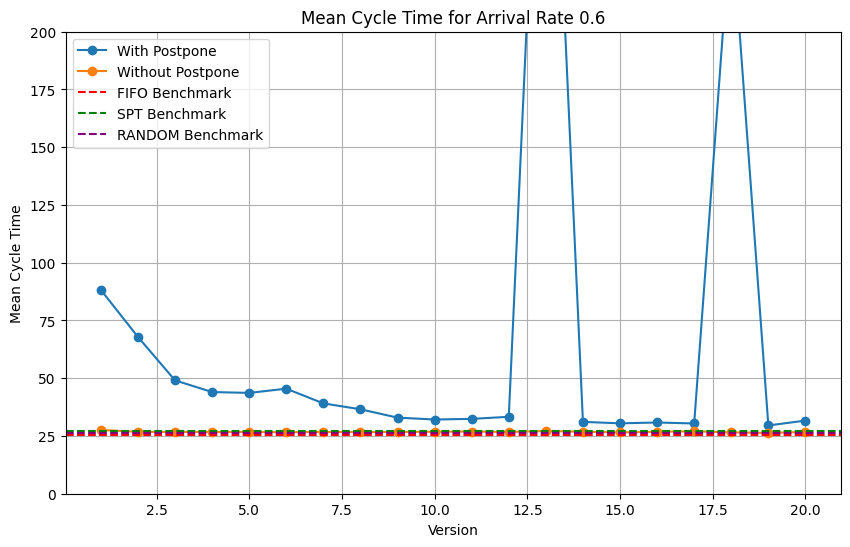

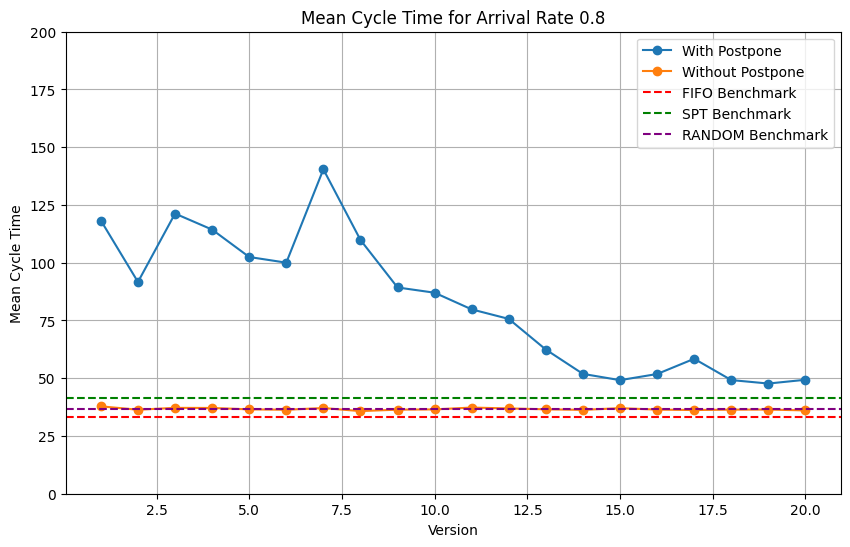

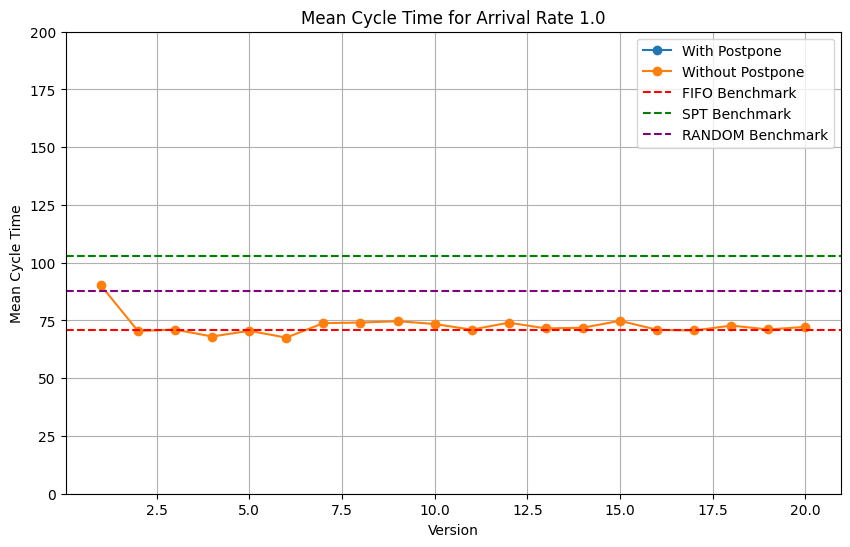

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the parameters
arrival_rates = [0.2, 0.4, 0.6, 0.8, 1.0]
versions = range(1, 21)
folders = {
    "With Postpone": "./training_data",
    "Without Postpone": "./training_data_no_postpone"
}

# Define the heuristics
heuristics = ["fifo", "spt", "random"]
heuristic_colors = {"fifo": "r", "spt": "g", "random": "purple"}

# Iterate over each arrival rate
for arrival_rate in arrival_rates:
    plt.figure(figsize=(10, 6))
    plt.title(f"Mean Cycle Time for Arrival Rate {arrival_rate*0.5}")
    plt.xlabel("Version")
    plt.ylabel("Mean Cycle Time")
    
    # Iterate over each folder (with and without postpone)
    for label, folder in folders.items():
        mean_cycle_times = []
        
        # Iterate over each version
        for version in versions:
            file_path = os.path.join(folder, f"composite_{arrival_rate}", f"composite.v{version}.txt")
            
            # Check if the file exists
            if os.path.exists(file_path):
                # Read the data
                data = pd.read_csv(file_path)
                cycle_times = data['cycle_time']
                
                # Calculate the mean cycle time
                mean_cycle_time = np.mean(cycle_times)
                mean_cycle_times.append(mean_cycle_time)
            else:
                print(f"File not found: {file_path}")
                mean_cycle_times.append(np.nan)  # Handle missing files
        
        # Plot the data
        plt.plot(versions, mean_cycle_times, marker='o', label=label)
    
    # Add horizontal lines for heuristic benchmarks
    for heuristic in heuristics:
        file_path = f"results_composite/{heuristic}/composite_{arrival_rate}/{heuristic}_composite.txt"
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the data
            data = pd.read_csv(file_path)
            cycle_times = data['cycle_time']
            
            # Calculate the mean cycle time
            mean_cycle_time = np.mean(cycle_times)
            
            # Add a horizontal line for this heuristic
            plt.axhline(y=mean_cycle_time, color=heuristic_colors[heuristic], linestyle='--', 
                      label=f"{heuristic.upper()} Benchmark")
        else:
            print(f"Heuristic file not found: {file_path}")
    plt.ylim(bottom=0)
    # Set y-axis limits
    if arrival_rate > 0.5:
        plt.ylim(top=200)
    elif arrival_rate > 0.3:
        plt.ylim(top=100)
    else:
        plt.ylim(top=50)
    plt.legend()
    plt.grid(True)
    #plt.savefig(f"mean_cycle_time_arrival_rate_{arrival_rate}.png")
    plt.show()

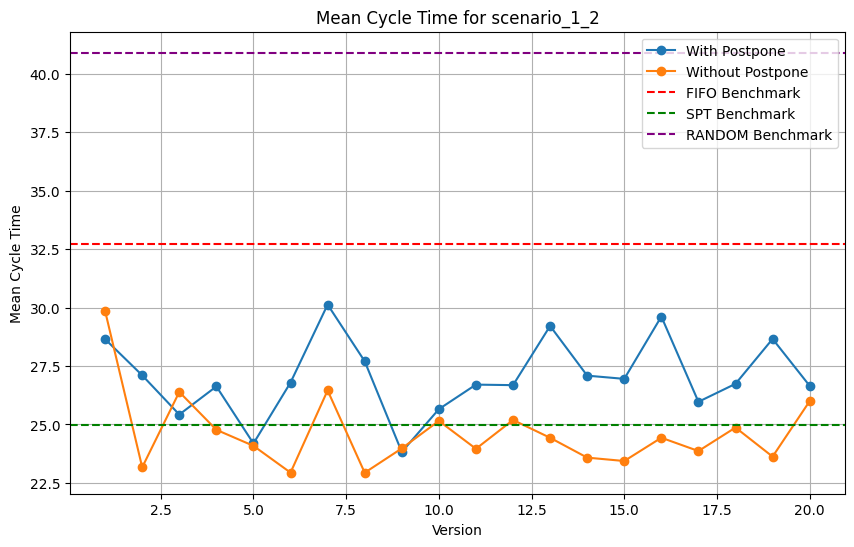

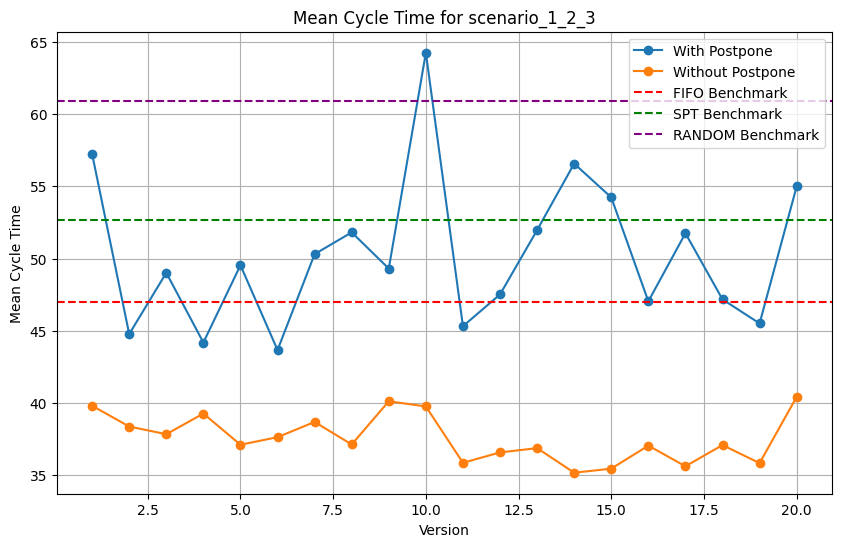

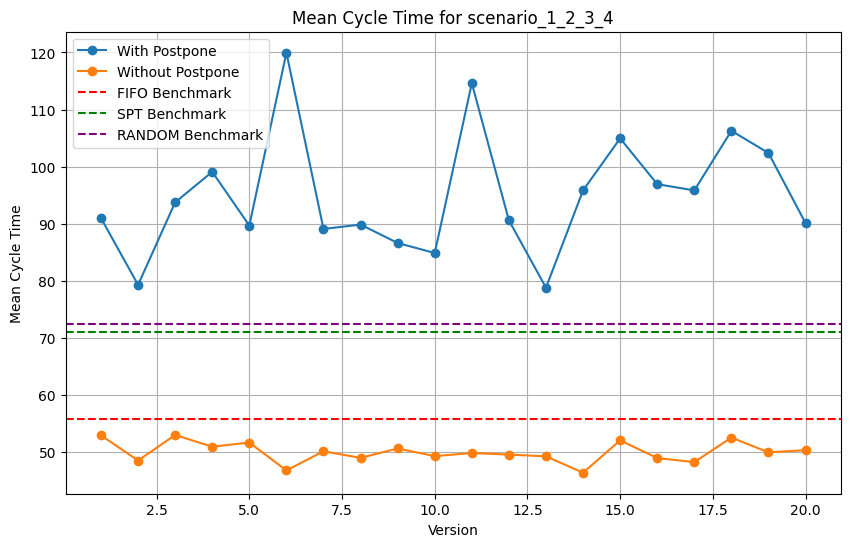

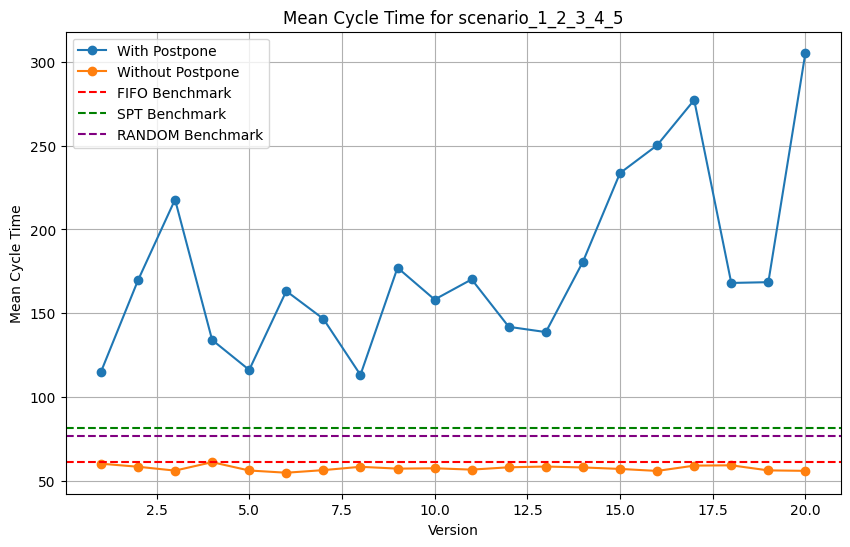

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the scenario processes
scenarios = ["scenario_1_2", "scenario_1_2_3", "scenario_1_2_3_4", "scenario_1_2_3_4_5"]
versions = range(1, 21)
folders = {
    "With Postpone": "./training_data",
    "Without Postpone": "./training_data_no_postpone"
}

# Define the heuristics
heuristics = ["fifo", "spt", "random"]
heuristic_colors = {"fifo": "r", "spt": "g", "random": "purple"}

# Iterate over each scenario
for scenario in scenarios:
    plt.figure(figsize=(10, 6))
    plt.title(f"Mean Cycle Time for {scenario}")
    plt.xlabel("Version")
    plt.ylabel("Mean Cycle Time")
    
    # Iterate over each folder (with and without postpone)
    for label, folder in folders.items():
        mean_cycle_times = []
        
        # Iterate over each version
        for version in versions:
            file_path = os.path.join(folder, scenario, f"{scenario}.v{version}.txt")
            
            # Check if the file exists
            if os.path.exists(file_path):
                # Read the data
                data = pd.read_csv(file_path)
                cycle_times = data['cycle_time']
                
                # Calculate the mean cycle time
                mean_cycle_time = np.mean(cycle_times)
                mean_cycle_times.append(mean_cycle_time)
            else:
                print(f"File not found: {file_path}")
                mean_cycle_times.append(np.nan)  # Handle missing files
        
        # Plot the data
        plt.plot(versions, mean_cycle_times, marker='o', label=label)
    
    # Add horizontal lines for heuristic benchmarks
    for heuristic in heuristics:
        file_path = f"results_composite/{heuristic}/{scenario}/{heuristic}_{scenario}.txt"
        
        # Check if the file exists
        if os.path.exists(file_path):
            # Read the data
            data = pd.read_csv(file_path)
            cycle_times = data['cycle_time']
            
            # Calculate the mean cycle time
            mean_cycle_time = np.mean(cycle_times)
            
            # Add a horizontal line for this heuristic
            plt.axhline(y=mean_cycle_time, color=heuristic_colors[heuristic], linestyle='--', 
                      label=f"{heuristic.upper()} Benchmark")
        else:
            print(f"Heuristic file not found: {file_path}")
    
    #plt.ylim(bottom=0)
    plt.legend()
    plt.grid(True)
    #plt.savefig(f"mean_cycle_time_{scenario}.png")
    plt.show()